In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

train_data.head()


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print('train data shape : {}'.format(train_data.shape))
print('test data shape : {}'.format(test_data.shape))

train data shape : (60000, 785)
test data shape : (10000, 785)


In [4]:
train_data = np.array(train_data, dtype= 'float32')
test_data = np.array(test_data, dtype= 'float32')

In [5]:
#Slicing the labels and Normalizing the pixel data.
X_train_orig = train_data[:, 1:]/ 255
y_train_orig = train_data[:, 0]

X_test = test_data[:, 1:]/ 255
Y_test = test_data[:, 0]

In [6]:

X_train, X_validate, y_train, y_validate = train_test_split(X_train_orig, y_train_orig, test_size = 0.2, random_state=42)

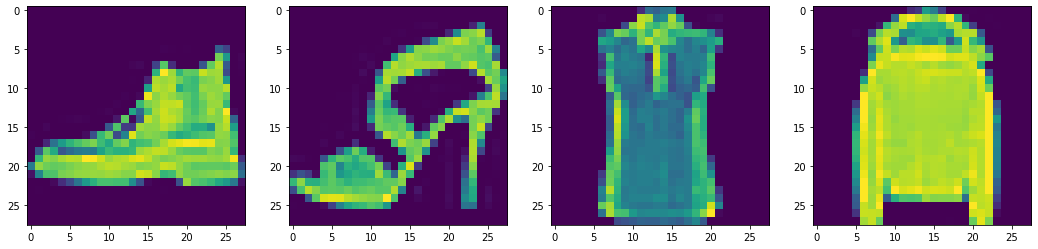

In [7]:
# Data Exploration.
plt.figure(figsize = (18,6))

plt.subplot(141)
image = X_train[49].reshape(28, 28)
plt.imshow(image)

plt.subplot(142)
image = X_train[3].reshape(28, 28)
plt.imshow(image)

plt.subplot(143)
image = X_train[6].reshape(28, 28)
plt.imshow(image)

plt.subplot(144)
image = X_train[8].reshape(28, 28)
plt.imshow(image)
plt.show()

In [8]:
#Data Preprocessing-reshape, labelling

image_rows = 28
image_cols = 28
input_shape = (image_rows, image_cols, 1)

X_train = X_train.reshape(X_train.shape[0], image_rows, image_cols, 1)
X_test = X_test.reshape(X_test.shape[0], image_rows, image_cols, 1)
X_validate = X_validate.reshape(X_validate.shape[0], image_rows, image_cols, 1)

print('x_train shape: {}'.format(X_train.shape))
print('x_test shape: {}'.format(X_test.shape))
print('x_validate shape: {}'.format(X_validate.shape))

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_validate = to_categorical(y_validate, 10)
y_test = to_categorical(Y_test, 10)

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


In [10]:
#CNN - 1 Convolution layer

cnn_model1 = Sequential()

cnn_model1.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model1.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model1.add(Dropout(0.25))

cnn_model1.add(Flatten()) 

cnn_model1.add(Dense(128, activation='relu'))
cnn_model1.add(Dropout(0.3))

cnn_model1.add(Dense(10, activation='softmax'))


In [11]:
#Compile
cnn_model1.compile(optimizer= Adam(learning_rate= 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [12]:
history1 = cnn_model1.fit(X_train, y_train,
          batch_size=300,
          epochs=50,
          verbose=1,
          validation_data=(X_validate, y_validate))

Epoch 1/50
160/160 [==============================] - 23s 142ms/step - loss: 1.1793 - accuracy: 0.6251 - val_loss: 0.6510 - val_accuracy: 0.7851
Epoch 2/50
160/160 [==============================] - 21s 133ms/step - loss: 0.6421 - accuracy: 0.7779 - val_loss: 0.5237 - val_accuracy: 0.8178
Epoch 3/50
160/160 [==============================] - 20s 126ms/step - loss: 0.5506 - accuracy: 0.8075 - val_loss: 0.4783 - val_accuracy: 0.8282
Epoch 4/50
160/160 [==============================] - 20s 124ms/step - loss: 0.5045 - accuracy: 0.8233 - val_loss: 0.4388 - val_accuracy: 0.8477
Epoch 5/50
160/160 [==============================] - 20s 124ms/step - loss: 0.4691 - accuracy: 0.8376 - val_loss: 0.4150 - val_accuracy: 0.8537
Epoch 6/50
160/160 [==============================] - 21s 129ms/step - loss: 0.4472 - accuracy: 0.8447 - val_loss: 0.4006 - val_accuracy: 0.8581
Epoch 7/50
160/160 [==============================] - 20s 127ms/step - loss: 0.4314 - accuracy: 0.8484 - val_loss: 0.3876 - val_ac

In [14]:
score1 = cnn_model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1]*100)

Test loss: 0.2467568814754486
Test accuracy: 91.25000238418579


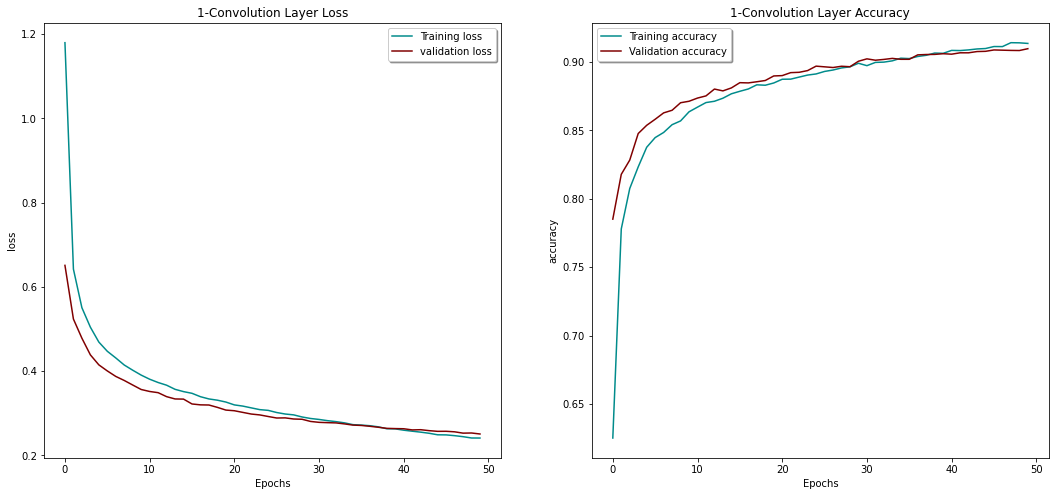

In [15]:
plt.figure(figsize = (18,8))

plt.subplot(121)
plt.plot(history1.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history1.history['val_loss'], color='maroon', label="validation loss")
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Loss')

plt.subplot(122)
plt.plot(history1.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history1.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('1-Convolution Layer Accuracy')
plt.show()

In [16]:
cnn_model1.save("cnn_model1.h5")

In [9]:
#CNN - 3 Convolution Layers

cnn_model3 = Sequential()

cnn_model3.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn_model3.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model3.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn_model3.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model3.add(Dropout(0.3))
cnn_model3.add(Flatten()) 

cnn_model3.add(Dense(128, activation='relu'))
cnn_model3.add(Dropout(0.5))

cnn_model3.add(Dense(256, activation='relu'))
cnn_model3.add(Dropout(0.5))

cnn_model3.add(Dense(10, activation='softmax'))

In [11]:
cnn_model3.compile(optimizer= Adam(learning_rate= 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
cnn_model3.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 128)         0

In [12]:
history3 = cnn_model3.fit(X_train, y_train, batch_size=300, epochs=50, verbose=1, validation_data=(X_validate, y_validate))

Epoch 1/50
160/160 [==============================] - 151s 934ms/step - loss: 1.5961 - accuracy: 0.4294 - val_loss: 0.7665 - val_accuracy: 0.7244
Epoch 2/50
160/160 [==============================] - 153s 954ms/step - loss: 0.8682 - accuracy: 0.6825 - val_loss: 0.6051 - val_accuracy: 0.7657
Epoch 3/50
160/160 [==============================] - 168s 1s/step - loss: 0.7354 - accuracy: 0.7269 - val_loss: 0.5512 - val_accuracy: 0.7831
Epoch 4/50
160/160 [==============================] - 167s 1s/step - loss: 0.6710 - accuracy: 0.7496 - val_loss: 0.5202 - val_accuracy: 0.7957
Epoch 5/50
160/160 [==============================] - 145s 904ms/step - loss: 0.6261 - accuracy: 0.7656 - val_loss: 0.4923 - val_accuracy: 0.8046
Epoch 6/50
160/160 [==============================] - 153s 954ms/step - loss: 0.5896 - accuracy: 0.7805 - val_loss: 0.4688 - val_accuracy: 0.8158
Epoch 7/50
160/160 [==============================] - 156s 973ms/step - loss: 0.5658 - accuracy: 0.7896 - val_loss: 0.4490 - val_a

In [13]:
score3 = cnn_model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1]*100)

Test loss: 0.2223663330078125
Test accuracy: 91.79999828338623


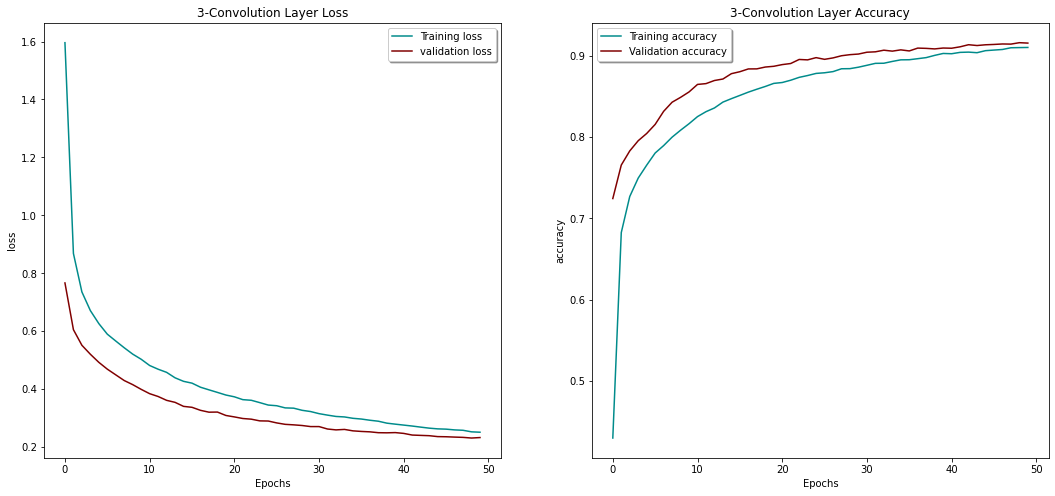

In [14]:
plt.figure(figsize = (18,8))
plt.subplot(121)
plt.plot(history3.history['loss'], color='darkcyan', label="Training loss")
plt.plot(history3.history['val_loss'], color='maroon', label="validation loss",)
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(loc='best', shadow=True)
plt.title('3-Convolution Layer Loss')

plt.subplot(122)
plt.plot(history3.history['accuracy'], color='darkcyan', label="Training accuracy")
plt.plot(history3.history['val_accuracy'], color='maroon',label="Validation accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend(loc='best', shadow=True)
plt.title('3-Convolution Layer Accuracy')
plt.show()

In [15]:
cnn_model3.save("cnn_model3.h5")

In [22]:
# converter = lite.TFLiteConverter.from_saved_model('cnn_model3.h5')
# tflite_model = converter.convert()
# open ('modell.tflite' , "wb").write(tfmodel)

In [24]:
tflite_model = tf.keras.models.load_model('cnn_model3.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(tflite_model)
tflite_save = converter.convert()
open("generated.tflite", "wb").write(tflite_save)

INFO:tensorflow:Assets written to: C:\Users\peddy\AppData\Local\Temp\tmpd6ekbt6m\assets


INFO:tensorflow:Assets written to: C:\Users\peddy\AppData\Local\Temp\tmpd6ekbt6m\assets


2156268

In [ ]:
class_names = ["Class 0 > T-shirt",
               "Class 1 > Trouser",
               "Class 2 > Pullover",
               "Class 3 > Dress",
               "Class 4 > Coat",
               "Class 5 > Sandal",
               "Class 6 > Shirt",
               "Class 7 > Sneaker",
               "Class 8 > Bag",
               "Class 9 > Ankle boot"]
print(classification_report(y_test, y_pred_classes, target_names=class_names))